# Rain Prediction in Australia 



With a predominant dry climate due to cold ocean currents and low elevation of landforms, more than 80% of Australia has an annual rainfall of less than 600 mm. For comparison purposes, the only other continent that receives less rainfall is Antarctica. The dry and arid climate factors  are the main contribuitors to the continent's high incidents of bushfires particulary during the summer months. Low relative humidity, wind and lack of rain can cause a small fire to spread rapidly. And so it is important to closely monitor and predict future rainy days. In this project I will try to predict upcoming rainy days in Australia, using a number of algorithms and choose the best one based on accuracy, performance and results. 

## Key Analytical Steps

1. Data visualization and preparation.
2. Training and testing the model.
3. Interpret prediction results.
4. Model comparison.
5. Conclusion and recommendations. 


 ### 1. Data visualization and preparation. 
 
The dataset that I am using for this analysis represents different weather indicators 
The dataset has a total of 142,193 observation distribueted over 24 columns/variables. My target variable is 'Rain Tomorrow'; a binary variables (yes, no), data type object. The remaining variables, represent the explenatory variables such as temperature, humidity, pressure, rainfall, evaporation etc. Most of the observations were recorded at a specific time of the day 9am and 3pm, over a 10 year period (2007 - 2017) and are spread between 49 cities. The following cells represent the data visualization methods that I use to better understand my dataset.


In [123]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 - Open weatherAUS.csv as pandas dataframe.

In [152]:
#Open dataset.
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


 - I used .shape to find out the number of observations and columns.

In [3]:
#There are 142,193 of observations and 24 variables/columns. 
df.shape

(142193, 24)

 - Check variables data types using df.info()
 There are 7 categorical variables, including the target variable and 17 numerical variables. 

In [86]:
#Categorical variables = type object
#Numerical variables = type float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

 - I now have a closer look at the target variable, Rain Tomorrow. I already know is a binary variable, but I am interested in the data distribution. I want to see how many rainy and non rainy days I have over a ten year period. For this step I will be using value_counts() to see how many observations I have for each value and illustrate the result as a bar chart using seaborn package. The values bellow highlight that 78% of the observation return non rainy day. Clearly Australia had a dry decade. 

In [5]:
#Explore target variable: RainTomorrow
#Outcome variable is a binary variable with no null values. 
df.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
#View distribution of target variable.
#No appears 77.58% times and Yes appears 22.42% times.
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

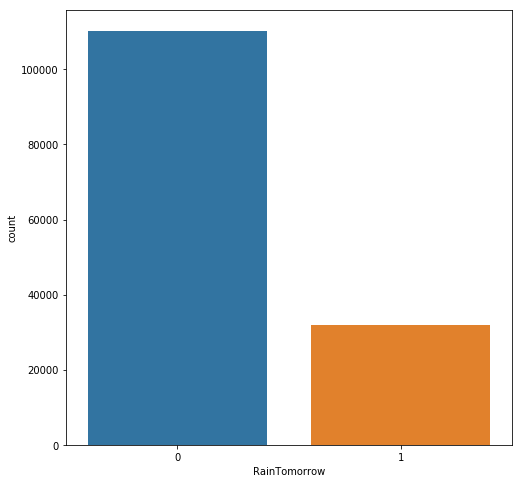

In [105]:
#Bar Chart 
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='RainTomorrow')


I also want to see the distribution of the targer variable in comparison to other factors, such as year and month. From Date column, I will extract first the year and display it as barplot. Then I will do the same with the month. From the illustrations bellow I can see that overall the majority of the observation are non rainy days, with a slightly increase in  rainy days in the years of 2010 and 2017 as well as for the months June and July. 

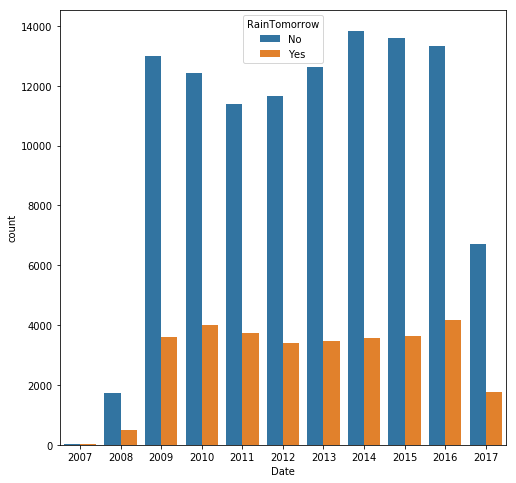

In [146]:
# Target variable distribution over time frame period. 
df['Date'] = pd.to_datetime( df['Date'] ).dt.year
#Bar Chart 
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='Date', hue="RainTomorrow")

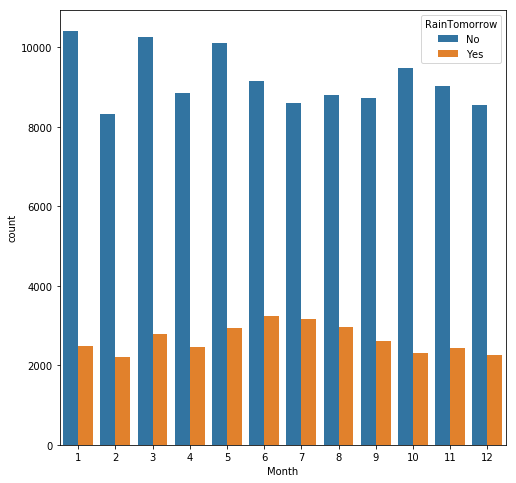

In [153]:
#Target variable distribution for each month. 
df['Date'] = pd.to_datetime( df['Date'] ).dt.month
df.rename(columns={'Date':'Month'}, inplace=True)
df.head()
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='Month', hue="RainTomorrow")

- Now that have a good idea of how the outcome variable is distributied over the dataset I will the pre-processing analysis. For this part of the project I will be performing a number of data cleaning methods to prepare the dataset for training. For these oerations I will be using dataframe.map()
        - Keep only the month from the date format and rename the column to 'Month'/
        - Change all variables with data type object to integer. 
        - Check for null values. Delete the columns with more than 50% nulls and the remaining null values fill up with means. 


In [154]:
#Change target data type from object type (No, Yes) to integer(0,1).
df['RainTomorrow'] = df['RainTomorrow'].map( {'No':0, 'Yes': 1} ) 
df['RainToday'] = df['RainToday'].map( {'No':0, 'Yes': 1} ) 
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,12,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,12,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


I am changing Location data type, by displaying the city names as a list, then adding an index and store it as dictionary. Lastly, use map method to change the name of the city with the associated index. I used the same approach for the ramining object type variables. 


In [89]:
#Change Location data type. 
Location_list = df['Location'].value_counts().index.tolist() 
Location_list 

['Canberra',
 'Sydney',
 'Perth',
 'Darwin',
 'Hobart',
 'Brisbane',
 'Adelaide',
 'Bendigo',
 'Townsville',
 'AliceSprings',
 'MountGambier',
 'Ballarat',
 'Launceston',
 'Albany',
 'Albury',
 'MelbourneAirport',
 'PerthAirport',
 'Mildura',
 'SydneyAirport',
 'Nuriootpa',
 'Sale',
 'Watsonia',
 'Tuggeranong',
 'Portland',
 'Woomera',
 'Cobar',
 'Cairns',
 'Wollongong',
 'GoldCoast',
 'WaggaWagga',
 'NorfolkIsland',
 'Penrith',
 'SalmonGums',
 'Newcastle',
 'CoffsHarbour',
 'Witchcliffe',
 'Richmond',
 'Dartmoor',
 'NorahHead',
 'BadgerysCreek',
 'MountGinini',
 'Moree',
 'Walpole',
 'PearceRAAF',
 'Williamtown',
 'Melbourne',
 'Nhil',
 'Katherine',
 'Uluru']

In [90]:
Location_dict = { i:j for i,j in zip( Location_list, range(len(Location_list)) ) } 
Location_dict

{'Canberra': 0,
 'Sydney': 1,
 'Perth': 2,
 'Darwin': 3,
 'Hobart': 4,
 'Brisbane': 5,
 'Adelaide': 6,
 'Bendigo': 7,
 'Townsville': 8,
 'AliceSprings': 9,
 'MountGambier': 10,
 'Ballarat': 11,
 'Launceston': 12,
 'Albany': 13,
 'Albury': 14,
 'MelbourneAirport': 15,
 'PerthAirport': 16,
 'Mildura': 17,
 'SydneyAirport': 18,
 'Nuriootpa': 19,
 'Sale': 20,
 'Watsonia': 21,
 'Tuggeranong': 22,
 'Portland': 23,
 'Woomera': 24,
 'Cobar': 25,
 'Cairns': 26,
 'Wollongong': 27,
 'GoldCoast': 28,
 'WaggaWagga': 29,
 'NorfolkIsland': 30,
 'Penrith': 31,
 'SalmonGums': 32,
 'Newcastle': 33,
 'CoffsHarbour': 34,
 'Witchcliffe': 35,
 'Richmond': 36,
 'Dartmoor': 37,
 'NorahHead': 38,
 'BadgerysCreek': 39,
 'MountGinini': 40,
 'Moree': 41,
 'Walpole': 42,
 'PearceRAAF': 43,
 'Williamtown': 44,
 'Melbourne': 45,
 'Nhil': 46,
 'Katherine': 47,
 'Uluru': 48}

In [91]:
df['Location'] = df['Location'].map( Location_dict ) 
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12,14,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,12,14,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,12,14,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,12,14,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,12,14,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [92]:
#Change WindGustDir data type. 
WindGustDir_list = df['WindGustDir'].value_counts().index.tolist()
WindGustDir_dict = { i:j for i,j in zip( WindGustDir_list, range(len(WindGustDir_list)) ) } 
df['WindGustDir'] = df['WindGustDir'].map(WindGustDir_dict)
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12,14,13.4,22.9,0.6,NaN,NaN,0.0,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,12,14,7.4,25.1,0.0,NaN,NaN,9.0,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,12,14,12.9,25.7,0.0,NaN,NaN,6.0,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,12,14,9.2,28.0,0.0,NaN,NaN,13.0,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,12,14,17.5,32.3,1.0,NaN,NaN,0.0,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [93]:
#Change WindDir9am data type. 
WindDir9am_list = df['WindDir9am'].value_counts().index.tolist()
WindDir9am_dict = { i:j for i,j in zip( WindDir9am_list, range(len(WindDir9am_list)) ) } 
df['WindDir9am'] = df['WindDir9am'].map(WindDir9am_dict)
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12,14,13.4,22.9,0.6,NaN,NaN,0.0,44.0,6.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,12,14,7.4,25.1,0.0,NaN,NaN,9.0,44.0,9.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,12,14,12.9,25.7,0.0,NaN,NaN,6.0,46.0,6.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,12,14,9.2,28.0,0.0,NaN,NaN,13.0,24.0,1.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,12,14,17.5,32.3,1.0,NaN,NaN,0.0,41.0,10.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [94]:
#Change WindDir3pm data type 
WindDir3pm_list = df['WindDir3pm'].value_counts().index.tolist()
WindDir3pm_dict = { i:j for i,j in zip( WindDir3pm_list, range(len(WindDir3pm_list)) ) } 
df['WindDir3pm'] = df['WindDir3pm'].map(WindDir3pm_dict)
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12,14,13.4,22.9,0.6,NaN,NaN,0.0,44.0,6.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,12,14,7.4,25.1,0.0,NaN,NaN,9.0,44.0,9.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,12,14,12.9,25.7,0.0,NaN,NaN,6.0,46.0,6.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,12,14,9.2,28.0,0.0,NaN,NaN,13.0,24.0,1.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,12,14,17.5,32.3,1.0,NaN,NaN,0.0,41.0,10.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [39]:
#Final data type check
#No object type variables. 
df.dtypes

Month              int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RISK_MM          float64
RainTomorrow       int64
dtype: object

 - Inspect missing values and delete the columns that have more than half null values. 

In [40]:
#Check NULL values. 
df.isnull().sum()

Month                0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [95]:
#Delete columns.
df = df.drop(columns=['RISK_MM','Evaporation','Sunshine','Cloud9am','Cloud3pm'])

In [96]:
#Replace with mean the remaining columns and final check. 
df = df.fillna(df.mean())
df.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

 - Discover relationships and patterns between variables of interest.
 Before doing any prediction analysis, is important to see if there are any statistical relationships between variables. This step is necesary to help which model should be used in the analysis. To accomplish this step, I am running a correlation analsys display the results as a heatmap.

In [155]:
#Correlation analysis overview
correlation_results = df.corr()


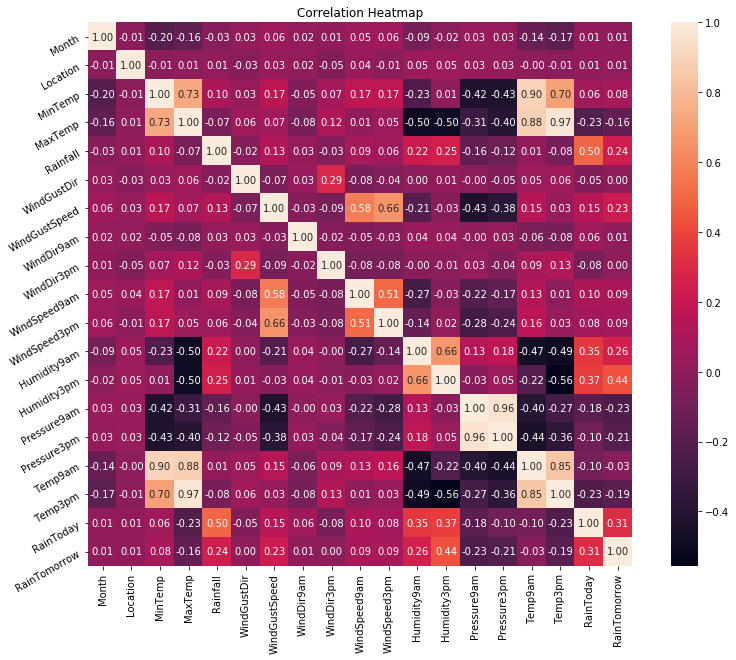

In [98]:
#Because I have a lot of variable it is quite hard to follow all the correlation coeficients and so 
#I wil display it as a heat map.
plt.figure(figsize=(14,10))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation_results, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In the above heatmap, each pair of variables recieves a correlation coeficient. The higher the value of the coeficient is, the stronger the connection between variables is. Lower coeficient indicated weak correlation. In this case I am interested in the positive highly correlated variables. The list below shows the most representative pairs:
 - Temp3pm & MaxTemp. Correlation coefficient 0.97
 - Pressure9am & Pressure3pm.Corr coefficient 0.96
 - Temp9am & MinTemp. Correlation coefficient 0.90
 - Temp9am & MaxTemp. Correlation coefficient 0.88
 - Temp9am & Temp3pm. Correlation coefficient 0.85
 - MaxTemp & MinTemp. Correlation coefficient 0.73
 - Temp3pm & MinTemp. Correlation coefficient 0.70

### 2. Training and testing the models.

There are a series of steps necesary before training the model. First, I will split my dataset between training data 75% and testing data 25%. Then I will declare the target variable as Y and the explenatory variables as X. Lastly, I will normalize the datset. This step is important because it helps improbe the performance of the algorithm by eliminating any posible outliers and preserve an equal distribution in the dataset. For this analysis I will be using a MinMaxScaler that will normalize the dataset by scaling all the features to a min and max value range. 

In [99]:
#Split data intro TRAIN(75%) and TEST(25%).
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split( df, test_size = 0.25, random_state= 0)
df_combine = [ df_train, df_test ]
df_train.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
12826,9,41,7.7,21.9,0.0,15.0,41.0,12.0,11.0,30.0,11.0,68.84381,51.482606,1029.0,1024.8,16.1,21.5,0.0,0
32391,4,1,16.0,25.0,0.4,12.0,26.0,14.0,0.0,17.0,15.0,65.00000,57.000000,1022.0,1018.8,19.3,24.0,0.0,0
185,6,14,2.8,16.1,0.0,0.0,20.0,8.0,1.0,4.0,11.0,86.00000,57.000000,1017.9,1015.1,7.6,15.6,0.0,0
36029,7,29,2.7,15.7,0.0,13.0,31.0,11.0,11.0,13.0,17.0,78.00000,58.000000,1028.5,1023.7,6.9,14.9,0.0,0
14020,6,41,7.6,16.3,0.8,7.0,44.0,13.0,4.0,11.0,28.0,96.00000,58.000000,1021.1,1019.3,8.5,15.8,0.0,0


In [100]:
#Declare explenatory variables as X and target variable as Y.
X_train = df_train.drop('RainTomorrow', axis = 1)
X_test = df_test.drop('RainTomorrow', axis = 1)
y_train = df_train['RainTomorrow']
y_test = df_test['RainTomorrow']
X_train.shape, X_test.shape

((106644, 18), (35549, 18))

 - Standardize dataset

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform( X_train ) 
X_train.loc[:,:] = scaled_values
scaled_values = scaler.transform( X_test ) 
X_test.loc[:,:] = scaled_values


I run a final statistics to check the distrbution in the train data.

In [54]:
X_train.describe()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
count,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000
mean,0.491273,0.473988,0.484331,0.529946,0.006304,0.465936,0.263161,0.465586,0.467802,0.107697,0.224276,0.688521,0.514807,0.613958,0.610339,0.510362,0.520067,0.223549
std,0.311658,0.286935,0.151827,0.134100,0.022594,0.292190,0.101712,0.298785,0.301769,0.067961,0.104843,0.189457,0.205197,0.111349,0.106815,0.136403,0.131566,0.414556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.229167,0.375297,0.431002,0.000000,0.200000,0.193798,0.200000,0.200000,0.053846,0.156627,0.570000,0.370000,0.545455,0.542400,0.411392,0.424184,0.000000
50%,0.454545,0.479167,0.479810,0.519849,0.000000,0.465370,0.255814,0.465598,0.466667,0.100000,0.224549,0.700000,0.514826,0.614112,0.610531,0.506329,0.512476,0.000000
75%,0.727273,0.729167,0.593824,0.623819,0.002156,0.733333,0.310078,0.733333,0.733333,0.146154,0.289157,0.830000,0.650000,0.682645,0.676800,0.605485,0.608445,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Algorithm comparison and results.

For this analysis I decided to run 4 classifying algorithrms to predict upcoming rainy days in Australia.
 - Logistic Regression Model. Estimates the probability of an even to occur, in this case a rainy-day vs a non rainy day to occur, when controlling for a number of factors (weather indicators). This model is widely used when the outcome variable is binary, like in this analysis, and so I expect high performance from this model.
 - Gaussian Naive Bayes Algorithm. Returns the probability of the given feature vector X  being associated with a label Y. This model runs better with a small dataset and usually used for text classification. Given the fact that my dataset is quite large and the high correlation between 6 of the variables, this model might not record high accuracy results. 
 - Random Forest Classifier. Takes random samples from dataset to create decision trees that will be used to extract the average of those decisions and form a more refined model. For this analysis I will start with 100 tree samples. Overall this model performs a complex analysis and works well with large datasets. 
 - Decision Tree Classifier. The most popular, straight forward classifier. It splits the data into partitions using as main parameter the target variable.


In [102]:
#Import packages for the analysis. 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

 -  Logistic Regression Model

In [69]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_log_reg1 = accuracy_score(y_test,y_pred_logreg) 
print('Model Score:'+ format(acc_log_reg1))


Model Score:0.8414020084953163


C:\Users\diana\AppData\Local\conda\conda\envs\DianaM_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 - Gaussian Naive Bayes Algorithm 

In [70]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_GNV = accuracy_score(y_test,y_pred) 
print(acc_GNV)

0.8093335958817407


 - Random Forest Classifier

In [103]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
acc_random_forest1 = accuracy_score(y_test,y_pred_rf) 
print(acc_random_forest1)

0.8552420602548595


 - Decision Tree Classifier

In [72]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test,y_pred) 
print(acc_decision_tree)

0.7828912205687923


 - Models Accuracy Results 

In [75]:
final_score = pd.DataFrame(
            {'ML Model': ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'Decision Tree'],
             'Model Score': [acc_random_forest1,acc_log_reg1, acc_GNV, acc_decision_tree]})
final_score

,ML Model,Model Score
0,Random Forest,0.853498
1,Logistic Regression,0.841402
2,Naive Bayes,0.809334
3,Decision Tree,0.782891


Based on the accuracy results, Random Forest and Logit model return the best scores. And so I will keep the first two model and run a more in deep comparison. 

### 4. Model comparison

In this last part of the analysis, I will be comparing the results of the models that registered high accuracy. But first, I wanted to make sure that the models were analysing correctly the unseen data and I will do this by checking for overfitting. When checking the accuracy score for train data separately from the test data and compare the values, there shouldn't be a big difference between the scores. The higher the difference the greter the error is and so the results can't not be further consider accurate. In this scenario,for both models the differences were quite small: 0.01 for logit model and 0.14 for random forest, which indicates that there is no question of overfitting. 




### Logit model

In [111]:
#Check if model is overfitting 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
acc_log_reg2 = accuracy_score(y_train,y_pred_train) 
print('Model Score for test data:'+ format(acc_log_reg1))
print('Model Score for train data:'+ format(acc_log_reg2))

Model Score for test data:0.8414020084953163
Model Score for train data:0.8388282510033382


C:\Users\diana\AppData\Local\conda\conda\envs\DianaM_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Then, I check the Confusion Matrix results. This is a tool for summarizing the performance of a classification algorithm. This will show the number of observations that were correclty predicted and the number of erros. The summary is represented in a tabular form , but for visualization purposes I also display it as a heatmap. 

There are four type of outcome indicators that reflect the performace of the model:
 - True Positives (TP) – The number of observations that were predicted correclty as rainy days. 
 - True Negatives (TN) – The number of observations that were predicted correclty as non-rainy days. 
 - False Positives (FP) – The number of observations that were predicted as rainy days, but actually they were non-rainy days. This is considered a Type1 error. 
 - False Negatives (FN) – The number of observations that were predicted as non-rainy days,where in fact they were non-rainy days. This is a very serious error and it is called Type2 error.

Now that I have an understanding of what a Confusion Matrix means, I will interpret the results. Both models returned the a great number of true positive observations, over 25,000. Which indicated that the model predicted correctly rainy days. In the logit model, the second highest number of observations returned as false negative, which is the Type2 error. The model predicted 4,243 times non-rainy days as rainy. This finding is a really big setback for the first model, compared to the random forest model, the second highest value is true negative. The model predicted correctly non-rainy days 4,040 times. As for the Type1 error, the false positive values are the lowest, for both models. The resulting indicators, is another clear sign that random forest has high accuracy score and great model performance.

In [112]:
#Confussion Matrix For Losistic Regression
cmatrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print('Confusion matrix\n\n', cmatrix_logreg)
print('\nTrue Positives(TP) = ', cmatrix_logreg[0,0])
print('\nTrue Negatives(TN) = ', cmatrix_logreg[1,1])
print('\nFalse Positives(FP) = ', cmatrix_logreg[0,1])
print('\nFalse Negatives(FN) = ', cmatrix_logreg[1,0])

Confusion matrix

 [[26148  1395]
 [ 4243  3763]]

True Positives(TP) =  26148

True Negatives(TN) =  3763

False Positives(FP) =  1395

False Negatives(FN) =  4243


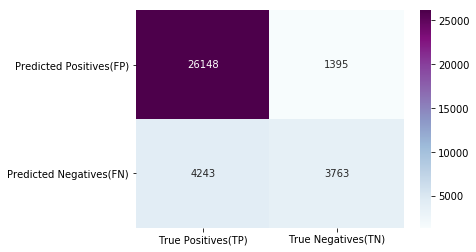

In [121]:
cm_map1 = pd.DataFrame(data=cmatrix_logreg, columns=['True Positives(TP)', 'True Negatives(TN)'], 
                                 index=['Predicted Positives(FP)', 'Predicted Negatives(FN)'])

sns.heatmap(cm_map1, annot=True, fmt='d', cmap='BuPu')

Classification report is another great way to evaluate the models performance. In this reports the results that are  displayed are precision, recall, F1 score and AUC.

 - Precision is a measure of correclty indentified positive cases from all predicted positive cases. 
 - Recall is a measure of correclty indentified positive cases from all the actual positive cases. 
 - Accuracy is the measure of all correctly identified cases.
 - F1 score is a harmonic mean of precision and recall.
 - ROC AUC (Receiver Operating Characteristic - Area Under Curve) is another tool to measure the perfomance of the model. In both cases is 0.70 which leave room for improvement.

In [78]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     27543
           1       0.73      0.47      0.57      8006

    accuracy                           0.84     35549
   macro avg       0.79      0.71      0.74     35549
weighted avg       0.83      0.84      0.83     35549



In [79]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
#This curve plots two parameters:
ROC_AUC = roc_auc_score(y_test, y_pred_logreg)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7097


### Random Forest Model

For this section I am repeting the analysis performed in the logit model and display the results. 

In [104]:
#Check if model is overfitting 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_train = random_forest.predict(X_train)
acc_random_forest2 = accuracy_score(y_train,y_pred_train) 
print('Model Score for test data:'+ format(acc_random_forest1))
print('Model Score for train data:'+ format(acc_random_forest2))

Model Score for test data:0.8552420602548595
Model Score for train data:0.9999624920295562


In [105]:
#Confussion Matrix For Losistic Regression
cmatrix_randomforest = confusion_matrix(y_test, y_pred_rf)
print('Confusion matrix\n\n', cmatrix_logreg)
print('\nTrue Positives(TP) = ', cmatrix_randomforest[0,0])
print('\nTrue Negatives(TN) = ', cmatrix_randomforest[1,1])
print('\nFalse Positives(FP) = ', cmatrix_randomforest[0,1])
print('\nFalse Negatives(FN) = ', cmatrix_randomforest[1,0])

Confusion matrix

 [[26148  1395]
 [ 4243  3763]]

True Positives(TP) =  26363

True Negatives(TN) =  4040

False Positives(FP) =  1180

False Negatives(FN) =  3966


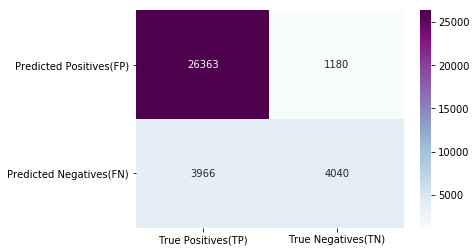

In [122]:
cm_map2 = pd.DataFrame(data=cmatrix_randomforest, columns=['True Positives(TP)', 'True Negatives(TN)'], 
                                 index=['Predicted Positives(FP)', 'Predicted Negatives(FN)'])

sns.heatmap(cm_map2, annot=True, fmt='d', cmap='BuPu')

In [106]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     27543
           1       0.77      0.50      0.61      8006

    accuracy                           0.86     35549
   macro avg       0.82      0.73      0.76     35549
weighted avg       0.85      0.86      0.84     35549



In [107]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
#This curve plots two parameters:
ROC_AUC2 = roc_auc_score(y_test, y_pred_rf)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7097


### 5. Conclusion and Recommendations


With an overall accuracy score of over 0.80 and AUC of 0.70, Random Forest model and Logistic Regression turned out to be the best model predictions as both did a great job at prediction if it will rain or not in Australia. As the models didn't show signs of overfitting, the results are considered valid. 

 - Recommendations
For Random forest I would increase the number of tree samples. As for Logistic regression I would try k-Fold Cross Validation to increase the performance of the model and filter the explanatory variables by keeping the highly significant ones. 

Although Random Forest model returned slightly better results, it is worth to mention that the processing time longer, compared to the logit model. Given the small difference in accuracy between models, in a scenario where the target variable is binary, I would choose logistic regression over random forest. 
